In [5]:
import numpy as np
import pandas as pd
import os
import glob as glob
import nibabel
import nilearn
from nilearn import image

In [111]:
filepath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM'
os.chdir(filepath)

In [3]:
filenames = glob.glob('s_03001_S_run*_unsorted_highres.nii.gz')
filenames

['s_03001_S_run1_unsorted_highres.nii.gz',
 's_03001_S_run2_unsorted_highres.nii.gz',
 's_03001_S_run3_unsorted_highres.nii.gz',
 's_03001_S_run4_unsorted_highres.nii.gz']

In [4]:
ips0roiname = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/ROIs/IPS0_F2.nii.gz'
v1roiname = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/ROIs/V1_F2.nii.gz'

In [6]:
run1 = nibabel.load(filenames[0])

In [7]:
run1.get_shape()

(256, 256, 176, 26)

In [23]:
first = image.index_img(filenames[0],0)

In [24]:
first.get_shape()

(256, 256, 176)

In [16]:
data = run1.get_data()

In [40]:
run1.affine

array([[   0.        ,    0.        ,   -0.89999998,   76.30410004],
       [   0.        ,   -0.89840001,    0.        ,  137.80599976],
       [  -0.89840001,    0.        ,    0.        ,  118.84899902],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [19]:
ips_mask = nibabel.load(ips0roiname)
v1_mask = nibabel.load(v1roiname)

In [26]:
from nilearn.plotting import plot_roi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

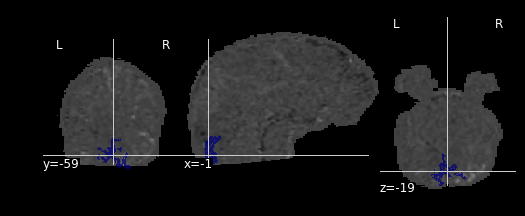

In [28]:
plot_roi(v1_mask,first)

###Consider resampling to lower resolution before masking the run

In [29]:
from nilearn.masking import apply_mask
ips_masked = apply_mask(run1,ips_mask)
v1_masked = apply_mask(run1,v1_mask)

In [30]:
ips_masked.shape

(26, 4558)

In [31]:
v1_masked.shape

(26, 7677)

In [39]:
from scipy.io import savemat

In [47]:
outname = 'ips0_trn.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [51]:
savemat(outpathname,{'ips0_trn':ips_masked})

##Generalize to combine 3 runs for training set

In [112]:
runs = ['run1', 'run2', 'run3', 'run4']
brains_dict = {}
for run in runs:
    print run
    filename = 's_03001_S_'+run+'_unsorted_highres.nii.gz'
    brains_dict[run] = {}
    brains_dict[run]['brain'] = nibabel.load(filename)
    brains_dict[run]['ips_masked'] = apply_mask(brains_dict[run]['brain'],ips_mask)
    brains_dict[run]['v1_masked'] = apply_mask(brains_dict[run]['brain'],v1_mask)
    print brains_dict[run]['ips_masked'].shape
    print brains_dict[run]['v1_masked'].shape

run1
(26, 4558)
(26, 7677)
run2
(26, 4558)
(26, 7677)
run3
(26, 4558)
(26, 7677)
run4
(26, 4558)
(26, 7677)


In [62]:
concat_ips = np.ma.concatenate([brains_dict['run1']['ips_masked'],brains_dict['run2']['ips_masked'],
                                 brains_dict['run3']['ips_masked']])
concat_v1 = np.ma.concatenate([brains_dict['run1']['v1_masked'],brains_dict['run2']['v1_masked'],
                                 brains_dict['run3']['v1_masked']])

In [63]:
concat_ips.shape

(78, 4558)

In [64]:
concat_v1.shape

(78, 7677)

In [65]:
outname = 'ips0_trn.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [66]:
savemat(outpathname,{'ips0_trn':concat_ips})

In [67]:
outname = 'v1_trn.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [68]:
savemat(outpathname,{'v1_trn':concat_v1})

In [86]:
ntrials = run1.shape[3]
trn_r = np.transpose(np.concatenate([np.repeat(1,ntrials),np.repeat(2,ntrials),np.repeat(3,ntrials)]))

In [96]:
trn_r.reshape((len(trn_r),1))
trn_r.shape

(78,)

In [103]:
trn_r = np.matrix(trn_r).transpose()

In [104]:
trn_r.shape

(78, 1)

##Create index for runs

In [105]:
outname = 'trn_r.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [106]:
savemat(outpathname,{'trn_r':trn_r})

## Now the test run

In [113]:
outname = 'ips0_tst.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [114]:
savemat(outpathname,{'ips0_tst':brains_dict['run4']['ips_masked']})

In [115]:
outname = 'v1_tst.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [116]:
savemat(outpathname,{'v1_tst':brains_dict['run4']['v1_masked']})

##Create index for test runs

In [120]:
tst_r = np.transpose(np.repeat(1,ntrials))
tst_r

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [121]:
tst_r = np.matrix(tst_r).transpose()
tst_r.shape

(26, 1)

In [122]:
outname = 'tst_r.mat'
outpath = '/Users/frankanayet/Google Drive/NLineData/fMRIResults/Peter_RSA/Peter_ROI_IEM/'
outpathname = outpath+outname

In [123]:
savemat(outpathname,{'tst_r':tst_r})